## Install detectron2

In [1]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-q9302x78
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-q9302x78
  Resolved https://github.com/facebookresearch/detectron2.git to commit ebe8b45437f86395352ab13402ba45b75b4d1ddb
  Preparing metadata (setup.py) ... done


## Importing Libraries

In [2]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

import numpy as np
import os,json,cv2,random
from google.colab.patches import cv2_imshow

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

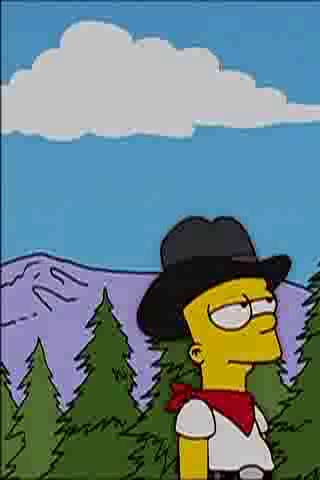

In [3]:
im=cv2.imread("/content/drive/MyDrive/Simpsons/train/bart/pic_0000.jpg")
cv2_imshow(im)

## Register Dataset

In [4]:
from detectron2.data.datasets import register_coco_instances
from detectron2.data import MetadataCatalog,DatasetCatalog

register_coco_instances("simpsons_train",{},"/content/drive/MyDrive/Simpsons/instances.json","/content/drive/MyDrive/Simpsons/train")

simpsons_metadata=MetadataCatalog.get("simpsons_train")
dataset_dicts=DatasetCatalog.get("simpsons_train")

[09/12 15:55:06 d2.data.datasets.coco]: Loaded 404 images in COCO format from /content/drive/MyDrive/Simpsons/instances.json


[09/12 15:55:06 d2.data.datasets.coco]: Loaded 404 images in COCO format from /content/drive/MyDrive/Simpsons/instances.json


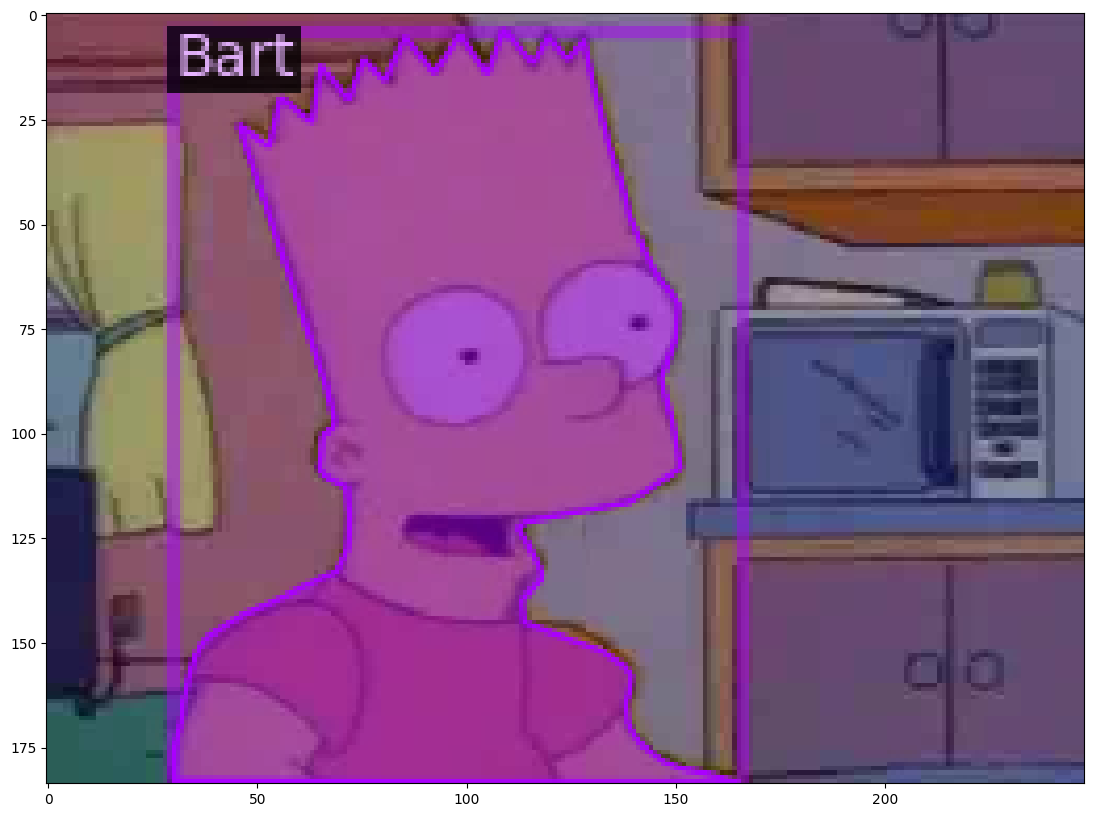

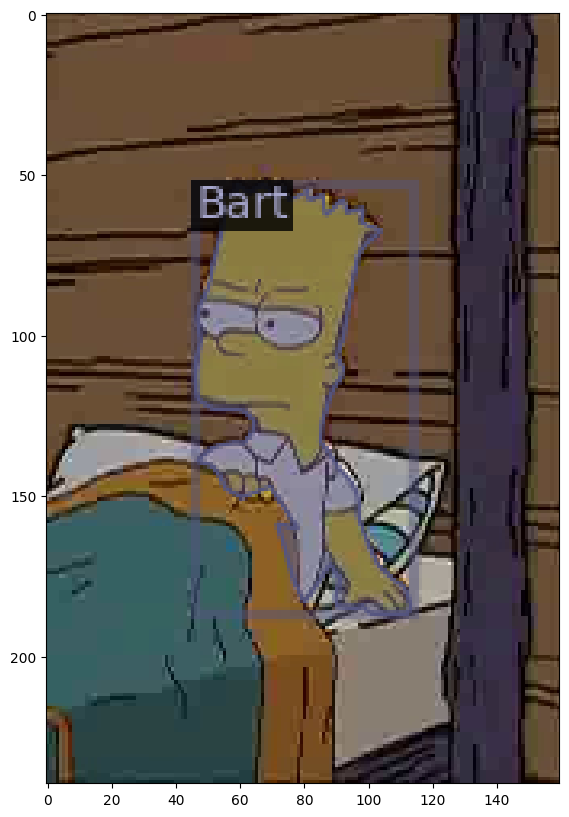

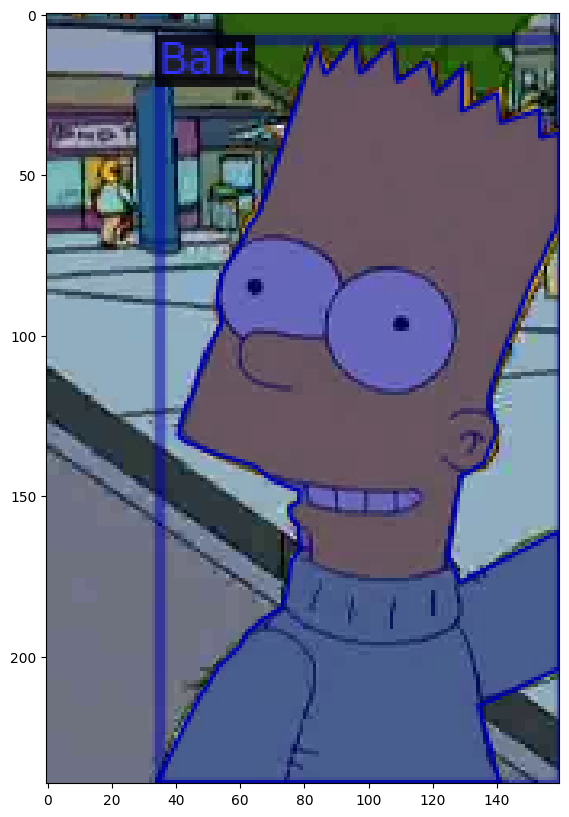

In [5]:
import random
import matplotlib.pyplot as plt
dataset_dicts=DatasetCatalog.get("simpsons_train")
for d in random.sample(dataset_dicts,3):
  img=cv2.imread(d["file_name"])
  v=Visualizer(img[:,:,::-1],metadata=simpsons_metadata,scale=0.5)
  v=v.draw_dataset_dict(d)
  plt.figure(figsize=(14,10))
  plt.imshow(cv2.cvtColor(v.get_image()[:,:,::-1],cv2.COLOR_BGR2RGB))
  plt.show()

## Train Model

In [11]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg

cfg=get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN=("simpsons_train",)
cfg.DATASETS.TEST=()
cfg.DATALOADER.NUM_WORKERS=2
cfg.MODEL.WEIGHTS=model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH=2
cfg.SOLVER.BASE_LR=0.00025
cfg.SOLVER.MAX_ITER=2000
cfg.SOLVER.STEPS=[]
cfg.MODEL.ROI_HEADS.NUM_CLASSES=5

os.makedirs(cfg.OUTPUT_DIR,exist_ok=True)
trainer=DefaultTrainer(cfg)
trainer.resume_or_load(resume=True)
trainer.train()

[09/12 16:09:29 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

/usr/local/lib/python3.10/dist-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu"))

[09/12 16:09:29 d2.engine.hooks]: Loading scheduler from state_dict ...
[09/12 16:09:29 d2.engine.train_loop]: Starting training from iteration 1000


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[09/12 16:09:39 d2.utils.events]:  eta: 0:08:04  iter: 1019  total_loss: 0.3439  loss_cls: 0.09732  loss_box_reg: 0.07627  loss_mask: 0.1348  loss_rpn_cls: 0.0002697  loss_rpn_loc: 0.005585    time: 0.4843  last_time: 0.5122  data_time: 0.0201  last_data_time: 0.0257   lr: 0.00025  max_mem: 2670M
[09/12 16:09:49 d2.utils.events]:  eta: 0:07:45  iter: 1039  total_loss: 0.3391  loss_cls: 0.0884  loss_box_reg: 0.07714  loss_mask: 0.1562  loss_rpn_cls: 0.0002219  loss_rpn_loc: 0.006051    time: 0.4849  last_time: 0.4873  data_time: 0.0120  last_data_time: 0.0037   lr: 0.00025  max_mem: 2681M
[09/12 16:09:59 d2.utils.events]:  eta: 0:07:41  iter: 1059  total_loss: 0.3641  loss_cls: 0.09232  loss_box_reg: 0.08293  loss_mask: 0.1622  loss_rpn_cls: 0.00053  loss_rpn_loc: 0.005994    time: 0.4867  last_time: 0.5202  data_time: 0.0116  last_data_time: 0.0039   lr: 0.00025  max_mem: 2681M
[09/12 16:10:09 d2.utils.events]:  eta: 0:07:34  iter: 1079  total_loss: 0.3164  loss_cls: 0.09448  loss_box_

In [12]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.DATASETS.TEST = ("simpsons_train", )
predictor = DefaultPredictor(cfg)

[09/12 16:17:49 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


/usr/local/lib/python3.10/dist-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu"))

[09/12 16:17:49 d2.data.datasets.coco]: Loaded 404 images in COCO format from /content/drive/MyDrive/Simpsons/instances.json


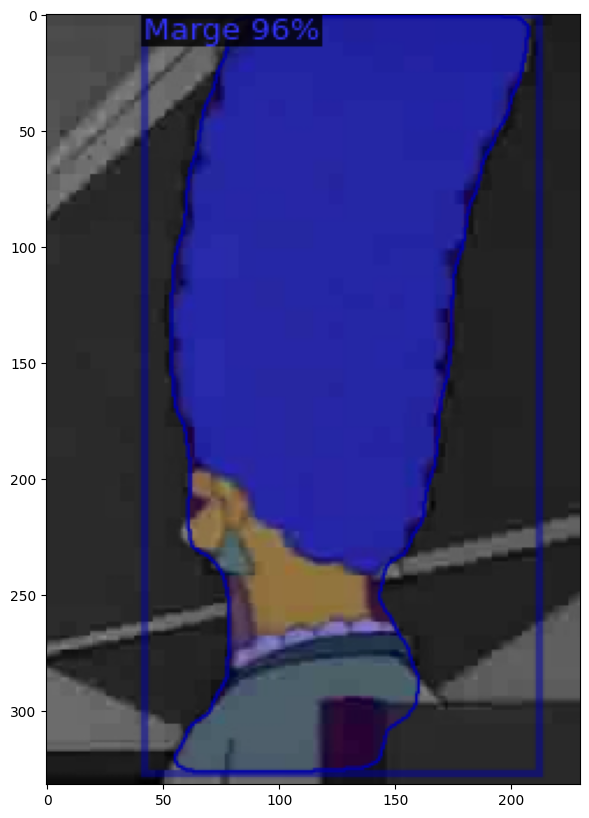

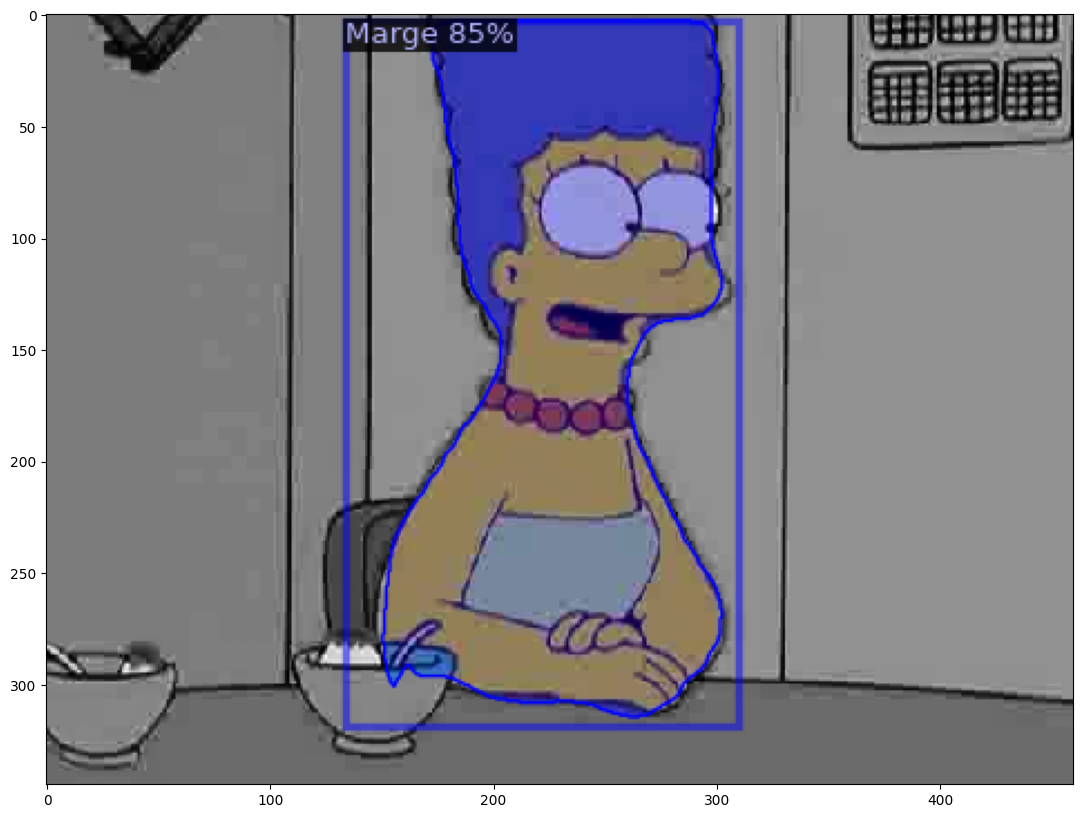

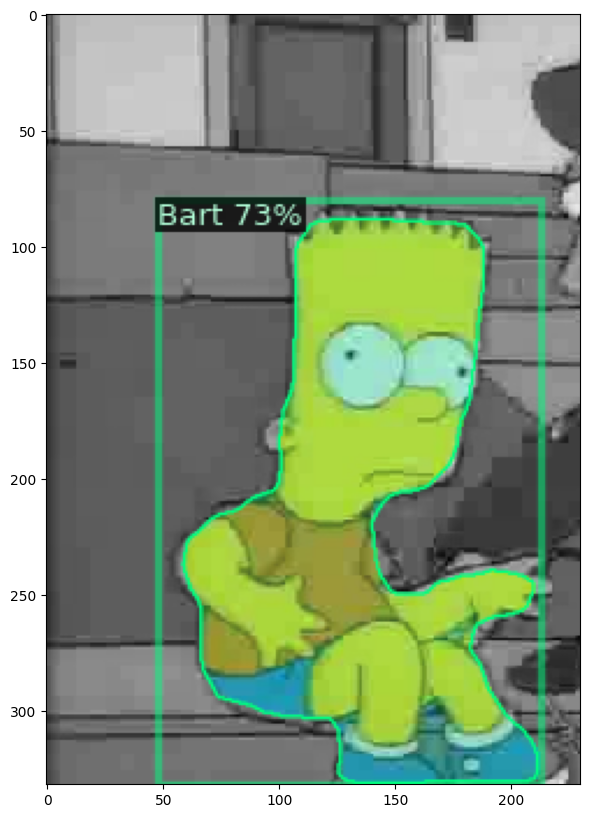

In [13]:
from detectron2.utils.visualizer import ColorMode
dataset_dicts=DatasetCatalog.get("simpsons_train")
for d in random.sample(dataset_dicts, 3):
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=simpsons_metadata,
                   scale=0.8,
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.figure(figsize = (14, 10))
    plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
    plt.show()

[09/12 16:17:51 d2.data.datasets.coco]: Loaded 404 images in COCO format from /content/drive/MyDrive/Simpsons/instances.json
{'instances': Instances(num_instances=1, image_height=480, image_width=640, fields=[pred_boxes: Boxes(tensor([[158.7961,   0.0000, 384.8264, 473.3334]], device='cuda:0')), scores: tensor([0.7283], device='cuda:0'), pred_classes: tensor([4], device='cuda:0'), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]]], device='cuda:0')])}


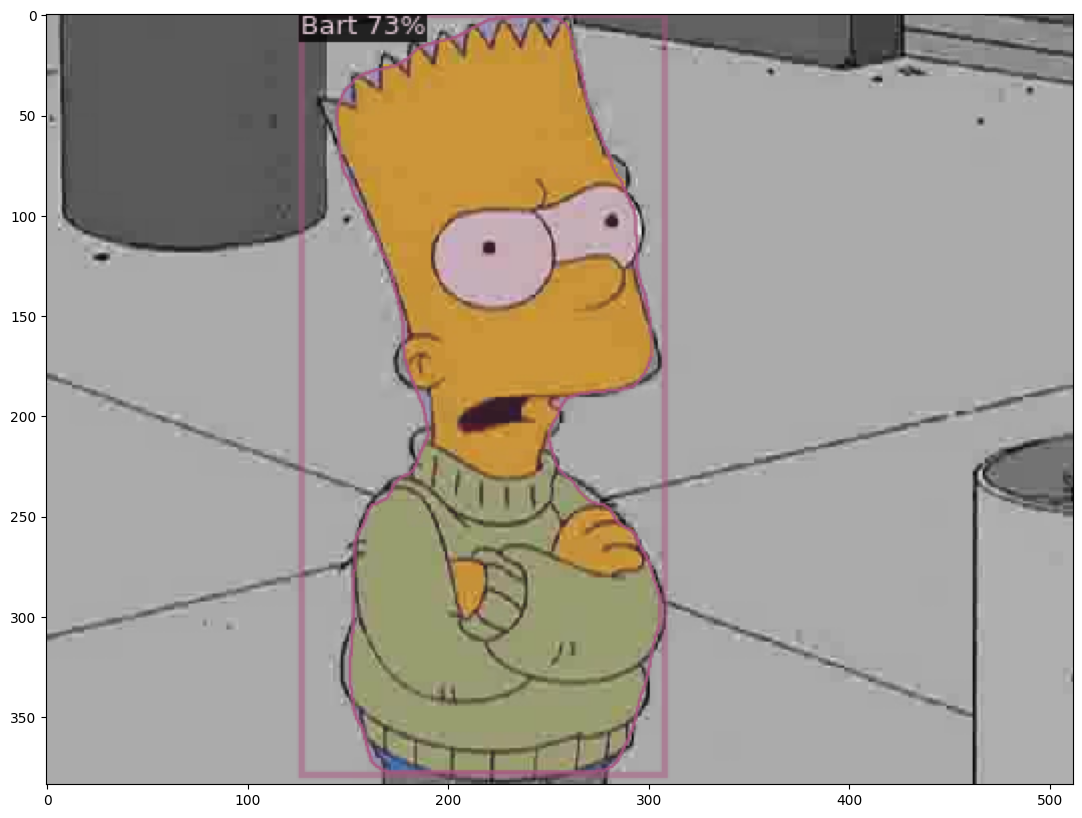

In [14]:
from detectron2.utils.visualizer import ColorMode
dataset_dicts=DatasetCatalog.get("simpsons_train")

im = cv2.imread("/content/drive/MyDrive/Simpsons/train/bart/pic_0080.jpg")
outputs = predictor(im)
print(outputs)
v = Visualizer(im[:, :, ::-1],
                metadata=simpsons_metadata,
                scale=0.8,
                instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize = (14, 10))
plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))
plt.show()